In [1]:
#Name: Harsimar Mangat
#Date: 9/27/2020 


In [2]:
from __future__ import print_function, division
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import first
import thinkstats2
import thinkplot

import  nsfg 

In [3]:
#Function for Exercise 3.2, this is hte distribution oberved by students, hence the 'biase'
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [4]:
#Function that takes Pmf object and computes the mean
def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

In [5]:
#Function that takes Pmf object and computes the variance
def PmfVar(pmf, mu=None):

    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var


pmf mean is:  38.56055968517709
pmf var is: 7.301863788195439
function mean is:  38.56055968517709
function var is:  7.301863788195439


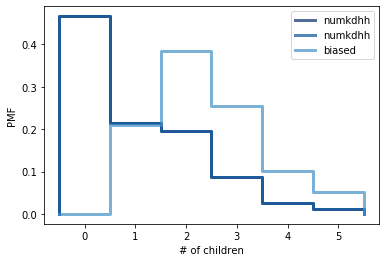

In [6]:
df=nsfg.ReadFemResp()

#Exercise 3.1
pmf=thinkstats2.Pmf(df.numkdhh,label='numkdhh')
thinkplot.Pmf(pmf)

thinkplot.Config(xlabel='# of children', ylabel='PMF')

biased = BiasPmf(pmf, label='biased')

#The following plot will show the actual and observed distribution. 
# The biased is the observed, and we see that their is are fewer children in their familys. 
#Overall, the bias mean is 2.40 vs the actual mean which was 1.024, therefore the bias is almost double.
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='# of children', ylabel='PMF')


#Using a PMF, we then compute the mean
pmf.Mean()
#Using the biased function, we compute the distribution as observed by children who are asked about their family size, hence the bias (page 32)
biased.Mean()

pmf.Var()

#Exercise 3.2

live, firsts, others = first.MakeFrames()

prglngth = live.prglngth

pmf = thinkstats2.Pmf(prglngth)
mean = PmfMean(pmf)
var = PmfVar(pmf)

#Below is the comparasion between the functional mean/variance and methods
print('pmf mean is: ',pmf.Mean())
print('pmf var is:', pmf.Var())

print('function mean is: ',mean)
print('function var is: ',var)


0.021862702229995628


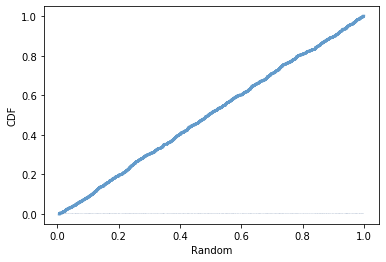

In [7]:
#Exercise 4.1
#Since we're investigating percentile ranks, we would use the cumulative distribution function. The CMF maps value to 
#it's percentile rank.

live, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
print(cdf.PercentileRank(7.4))


#Exercise 4.2
#Generate random numbers
rand = np.random.random(1000)

#Generate chart that shows PMF
pmf = thinkstats2.Pmf(rand)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random', ylabel='PMF')

#Generate chart that shows CDF
cdf = thinkstats2.Cdf(rand)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random', ylabel='CDF')

#The CDF chart is close to a straight line, which means the distribution is uniform.
